# Flow: 
### 1) Finding the top cryptocurrencies based on Market Cap, Top performers, Top strugglers
### 2) Finding prices of different crypto currencies over time
### 3) Finding the correlation between different crypto currencies
### 4) Correlation between bitcoin and SP500
### 5) Bitcoin rich list:Bitcoins distribtution across users, Addresses richer than specific amount, top 100 richest bitcoin users
### 6) Using Google Trends to Estimate Bitcoin's User Growth and adoption across different locations in the world
### 7) Altcoins sentiment analysis from news & twitter: Positive-negative sentiment analysis, comparitive emotion analyser, word clouds
### 8) Finding top trending stocks of SP500 and applying sentiment analysis designed for crypto currencies
### 9) Forecasting the price of bitcoin using Machine learning linear regression
### 10) Macro analysis of bitcoin over time: Unconfirmed transactions, Median transaction confirmation time, Average block    size,Avergae no. of transactions per block, transaction fees earned by minors each day, Ratio of transaction fee to transaction volume, Number of transactions per day, Ration of unique addresses to transactions, correlation between each time series

# 1)Finding the top cryptocurrencies based on Market Cap, Top performers, Top strugglers

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## code for fetching database and extracting the most current list of crypto-coins:

In [106]:
# Extracting a full list of Cryptocurrencies
 
import json
from bs4 import BeautifulSoup
import requests 
 
url = "https://www.cryptocompare.com/api/data/coinlist/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
data = json.loads(soup.prettify())
data = data['Data']
 
# print(data)  # display the content

In [108]:
crypto_lst = sorted(list(data.keys()))
print(crypto_lst[:50])

['007', '1337', '1CR', '1ST', '2015', '2BACCO', '2GIVE', '32BIT', '365', '3DES', '404', '42', '4CHN', '611', '808', '888', '8BIT', '8BT', '8S', 'ABC', 'ABT', 'ABY', 'ABYSS', 'AC', 'ACC', 'ACE', 'ACES', 'ACID', 'ACN', 'ACOIN', 'ACP', 'ACT', 'ADA', 'ADC', 'ADCN', 'ADL', 'ADN', 'ADST', 'ADT', 'ADX', 'ADZ', 'AE', 'AEC', 'AEON', 'AERM', 'AERO', 'AGRS', 'AGS', 'AHT', 'AHT*']


In [5]:
len(crypto_lst)

1843

## Cryptocurrencies by Market Cap:

In [109]:
# Getting a List of Cryptocurrencies sorted by their most current Market Cap
 
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
 
url = "https://api.coinmarketcap.com/v1/ticker/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
dic = json.loads(soup.prettify())
 
# create an empty DataFrame
df = pd.DataFrame(columns=["Ticker", "MarketCap","Price in USD","Price in BTC","%change in last 1h","% change in last 24h","perc change in last 7d"])
 
for i in range(len(dic)):
    df.loc[len(df)] = [dic[i]['symbol'], dic[i]['market_cap_usd'],dic[i]['price_usd'],dic[i]['price_btc'],dic[i]['percent_change_1h'],dic[i]['percent_change_24h'],dic[i]['percent_change_7d']]

# apply conversion to numeric as 'df' contains lots of 'None' string as values
df.MarketCap = pd.to_numeric(df.MarketCap)

df=df.sort_values(by=['MarketCap'],ascending=False)
# df

In [110]:
P = df[df.MarketCap > 30e6]
P[0:10]

Ticker     MarketCap Price in USD Price in BTC %change in last 1h  \
0    BTC  1.943749e+11      11626.0          1.0              -0.02   
1    ETH  4.548694e+10      473.208    0.0410304               -0.0   
2    BCH  2.645231e+10      1571.08     0.136223              -0.54   
3    XRP  9.825426e+09     0.254394   0.00002206               0.03   
4  MIOTA  6.779552e+09       2.4391   0.00021149              -1.56   
5   DASH  5.973592e+09      772.532    0.0669839               0.34   
6    BTG  5.536750e+09      331.792    0.0287687               -0.5   
7    LTC  5.473434e+09      101.137   0.00876926              -0.28   
8    ADA  3.545579e+09     0.136752   0.00001186              -0.55   
9    XMR  3.101393e+09      200.957    0.0174244              -0.23   

  % change in last 24h perc change in last 7d  
0                 3.43                  20.12  
1                 0.44                  -1.75  
2                 -2.3                  -6.45  
3                 -0.7                   1.21  
4                62.01                 182.67  
5                -0.81                  22.73  
6                 7.79                 -10.11  
7                 0.31                  11.39  
8                  3.7                 192.05  
9                -0.77                  22.36

## Biggest gainers of this week

In [8]:
df['perc change in last 7d'] = pd.to_numeric(df['perc change in last 7d'])
df2=df.sort_values(by=['perc change in last 7d'],ascending=False)
df2[0:10]

Ticker     MarketCap Price in USD Price in BTC %change in last 1h  \
59    MNX  1.636233e+08      54.5411   0.00470619              -1.26   
8     ADA  3.578921e+09     0.138038   0.00001191               4.84   
4   MIOTA  6.933510e+09      2.49449   0.00021524               5.52   
26    NXT  4.980055e+08     0.498504   0.00004301               2.86   
86    GRS  9.284786e+07      1.34692   0.00011622               0.75   
40    SNT  2.608783e+08    0.0751706   0.00000649               1.16   
62    SAN  1.537013e+08      2.53957   0.00021913              -2.95   
14    XLM  1.674684e+09    0.0942799   0.00000814               0.97   
90    PPC  8.655427e+07      3.53454   0.00030499                3.0   
47    WTC  2.311751e+08      9.28482   0.00080116               1.64   

   % change in last 24h  perc change in last 7d  
59                 9.79                  255.51  
8                  4.98                  200.11  
4                 68.85                  192.35  
26                30.19                  160.52  
86                41.56                  114.38  
40                -3.21                   99.59  
62                 17.2                   94.50  
14                 1.16                   88.03  
90                 1.42                   86.68  
47                -8.48                   81.52

## Biggest loosers of this week

In [9]:
df['perc change in last 7d'] = pd.to_numeric(df['perc change in last 7d'])
df3=df.sort_values(by=['perc change in last 7d'],ascending=True)
df3[0:10]

Ticker     MarketCap Price in USD Price in BTC %change in last 1h  \
57    RDN  1.661133e+08       3.3124   0.00028582               0.14   
82    ETP  1.028468e+08       2.8137   0.00024279               0.74   
99    LKK  7.375294e+07     0.280023   0.00002416               0.66   
56    XUC  1.714469e+08      6.91359   0.00059655              -0.47   
83   PURA  9.746007e+07     0.566801   0.00004891               0.25   
95    QSP  8.285097e+07     0.134212   0.00001158               1.83   
79  ETHOS  1.109462e+08      1.48079   0.00012777               0.42   
21    HSR  7.591733e+08      17.9351   0.00154757              -0.07   
63    ICN  1.500726e+08      1.50391   0.00012977               1.77   
6     BTG  5.563737e+09       333.41    0.0287689               1.21   

   % change in last 24h  perc change in last 7d  
57                -9.48                  -36.51  
82                -0.42                  -24.88  
99                -4.72                  -18.67  
56                -1.63                  -17.28  
83                -3.85                  -16.76  
95                  5.5                  -14.06  
79                -1.23                  -12.28  
21                -4.69                  -11.89  
63                 0.68                   -9.80  
6                   9.8                   -9.79

# 2) Finding prices of different crypto currencies over time

### Retrieving Bitcoin Pricing Data from  Quandl's free Bitcoin API. (https://blog.quandl.com/api-for-bitcoin-data)

In [10]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [11]:
#Pulling Kraken exchange BTC Pricing data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Cached BCHARTS/KRAKENUSD at BCHARTS-KRAKENUSD.pkl


In [13]:
btc_usd_price_kraken.head()

Open       High        Low      Close  Volume (BTC)  \
Date                                                                   
2014-01-07  874.67040  892.06753  810.00000  810.00000     15.622378   
2014-01-08  810.00000  899.84281  788.00000  824.98287     19.182756   
2014-01-09  825.56345  870.00000  807.42084  841.86934      8.158335   
2014-01-10  839.99000  857.34056  817.00000  857.33056      8.024510   
2014-01-11  858.20000  918.05471  857.16554  899.84105     18.748285   

            Volume (Currency)  Weighted Price  
Date                                           
2014-01-07       13151.472844      841.835522  
2014-01-08       16097.329584      839.156269  
2014-01-09        6784.249982      831.572913  
2014-01-10        6780.220188      844.938794  
2014-01-11       16698.566929      890.671709

In [19]:
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])


#### There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and we obviously don't want them to be reflected in our overall pricing analysis.The nature of Bitcoin exchanges is that the pricing is determined by supply and demand, hence no single exchange contains a true "master price" of Bitcoin. To solve this issue, along with that of down-spikes (which are likely the result of technical outages and data set glitches) we will pull data from three more major Bitcoin exchanges to calculate an aggregate Bitcoin price index.

### Pulling pricing data for 3 more BTC exchanges

In [20]:
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Cached BCHARTS/COINBASEUSD at BCHARTS-COINBASEUSD.pkl
Cached BCHARTS/BITSTAMPUSD at BCHARTS-BITSTAMPUSD.pkl
Cached BCHARTS/ITBITUSD at BCHARTS-ITBITUSD.pkl


### Merging All Of The Pricing Data Into A Single Dataframe

In [21]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [22]:
# Merging the BTC price dataseries' into a single dataframe on their "Weighted Price" column
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [23]:
btc_usd_datasets.tail()

BITSTAMP      COINBASE         ITBIT        KRAKEN
Date                                                              
2017-11-30   9715.306791   9940.329483   9704.881677   9894.191618
2017-12-01  10287.373047  10293.184141  10364.119476  10296.380966
2017-12-02  10927.843358  10946.056300  10929.867866  10926.747343
2017-12-03  11249.499550  11317.806361  11241.321426  11274.703356
2017-12-04  11214.873371  11275.417563           NaN  11248.701168

### Visualizing The Pricing Datasets:

In [24]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [25]:
# Plotting all of the BTC exchange prices
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

### Cleaning and Aggregating the Pricing Data

In [26]:
# Remove "0" values
btc_usd_datasets.replace(0, np.nan, inplace=True)

In [27]:
# Plot the revised dataframe
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

In [28]:
# Calculating the average BTC price as a new column
btc_usd_datasets['avg_btc_price_usd'] = btc_usd_datasets.mean(axis=1)

In [29]:
# Plotting the average BTC price
btc_trace = go.Scatter(x=btc_usd_datasets.index, y=btc_usd_datasets['avg_btc_price_usd'])
py.iplot([btc_trace])

# 3) Finding the correlation between different crypto currencies

### Retrieving Altcoin Pricing Data from Poloniex API (https://poloniex.com/support/api/)

In [30]:
# Function to download and cache JSON data from a provided URL:
def get_json_data(json_url, cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:        
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(json_url))
    except (OSError, IOError) as e:
        print('Downloading {}'.format(json_url))
        df = pd.read_json(json_url)
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(json_url, cache_path))
    return df

In [31]:
#function that will generate Poloniex API HTTP requests, 
#and will subsequently call our new get_json_data function to save the resulting data
base_polo_url = 'https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'
start_date = datetime.strptime('2015-01-01', '%Y-%m-%d') # get data from the start of 2015
end_date = datetime.now() # up until today
pediod = 86400 # pull daily data (86,400 seconds per day)

def get_crypto_data(poloniex_pair):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url = base_polo_url.format(poloniex_pair, start_date.timestamp(), end_date.timestamp(), pediod)
    data_df = get_json_data(json_url, poloniex_pair)
    data_df = data_df.set_index('date')
    return data_df

In [79]:
#downloading exchange data for nine of the top cryptocurrencies
altcoins = ['ETH','LTC','XRP','ETC','STR','DASH','SC','XMR','XEM']

altcoin_data = {}
for altcoin in altcoins:
    coinpair = 'BTC_{}'.format(altcoin)
    crypto_price_df = get_crypto_data(coinpair)
    altcoin_data[altcoin] = crypto_price_df

Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETC&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_STR&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_DASH&start=1420088400.0&end=1512375126.588438&period=86400 from cache
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_SC&start=1420088400.0&end=1512375126.588438&period=86

In [34]:
altcoin_data['ETH'].tail()

close      high       low      open    quoteVolume  \
date                                                                
2017-11-30  0.043770  0.044845  0.042450  0.043300  133166.850227   
2017-12-01  0.042447  0.044571  0.042202  0.043615   82865.313025   
2017-12-02  0.041811  0.042657  0.041600  0.042447   59068.068770   
2017-12-03  0.041286  0.042200  0.040400  0.041966   90700.958596   
2017-12-04  0.040850  0.041247  0.040110  0.041120   19205.906989   

                 volume  weightedAverage  
date                                      
2017-11-30  5801.811208         0.043568  
2017-12-01  3589.518042         0.043317  
2017-12-02  2484.743072         0.042066  
2017-12-03  3744.967920         0.041289  
2017-12-04   781.049688         0.040667

In [80]:
# Calculating USD Price as a new column in each altcoin dataframe
for altcoin in altcoin_data.keys():
    altcoin_data[altcoin]['price_usd'] =  altcoin_data[altcoin]['weightedAverage'] * btc_usd_datasets['avg_btc_price_usd']

In [81]:
# Merging USD price of each altcoin into single dataframe 
combined_df = merge_dfs_on_column(list(altcoin_data.values()), list(altcoin_data.keys()), 'price_usd')

In [82]:
# Adding BTC price to the dataframe
combined_df['BTC'] = btc_usd_datasets['avg_btc_price_usd']

In [38]:
# Chart all of the altocoin prices along with BTC
df_scatter(combined_df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

## Performing Correlation Analysis

In [39]:
# Calculating the pearson correlation coefficients for cryptocurrencies in 2016
combined_df_2016 = combined_df[combined_df.index.year == 2016]
combined_df_2016.pct_change().corr(method='pearson')

DASH       ETC       ETH       LTC        SC       STR       XEM  \
DASH  1.000000  0.003992  0.122695 -0.012194  0.026602  0.058083  0.014571   
ETC   0.003992  1.000000 -0.181991 -0.131079 -0.008066 -0.102654 -0.080938   
ETH   0.122695 -0.181991  1.000000 -0.064652  0.169642  0.035093  0.043205   
LTC  -0.012194 -0.131079 -0.064652  1.000000  0.012253  0.113523  0.160667   
SC    0.026602 -0.008066  0.169642  0.012253  1.000000  0.143252  0.106153   
STR   0.058083 -0.102654  0.035093  0.113523  0.143252  1.000000  0.225132   
XEM   0.014571 -0.080938  0.043205  0.160667  0.106153  0.225132  1.000000   
XMR   0.121537 -0.105898  0.087216  0.129475  0.047910  0.027998  0.016438   
XRP   0.088657 -0.054095  0.085630  0.053712  0.021098  0.320116  0.101326   
BTC  -0.014040 -0.170538 -0.006502  0.750174  0.035116  0.079075  0.227674   

           XMR       XRP       BTC  
DASH  0.121537  0.088657 -0.014040  
ETC  -0.105898 -0.054095 -0.170538  
ETH   0.087216  0.085630 -0.006502  
LTC   0.129475  0.053712  0.750174  
SC    0.047910  0.021098  0.035116  
STR   0.027998  0.320116  0.079075  
XEM   0.016438  0.101326  0.227674  
XMR   1.000000  0.027649  0.127520  
XRP   0.027649  1.000000  0.044161  
BTC   0.127520  0.044161  1.000000

### Correlation heat map

In [40]:
def correlation_heatmap(df, title, absolute_bounds=True):
    '''Plot a correlation heatmap for the entire dataframe'''
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').as_matrix(),
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

In [41]:
correlation_heatmap(combined_df_2016.pct_change(), "Cryptocurrency Correlations in 2016")

####  To test our hypothesis that the cryptocurrencies have become more correlated in recent months, let's repeat the same test using only the data from 2017.

In [42]:
combined_df_2017 = combined_df[combined_df.index.year == 2017]
combined_df_2017.pct_change().corr(method='pearson')

DASH       ETC       ETH       LTC        SC       STR       XEM  \
DASH  1.000000  0.351165  0.473620  0.290017  0.214827  0.170367  0.306509   
ETC   0.351165  1.000000  0.580107  0.478016  0.285414  0.203266  0.312950   
ETH   0.473620  0.580107  1.000000  0.367568  0.357359  0.254889  0.386862   
LTC   0.290017  0.478016  0.367568  1.000000  0.340111  0.332672  0.303281   
SC    0.214827  0.285414  0.357359  0.340111  1.000000  0.410250  0.343814   
STR   0.170367  0.203266  0.254889  0.332672  0.410250  1.000000  0.387374   
XEM   0.306509  0.312950  0.386862  0.303281  0.343814  0.387374  1.000000   
XMR   0.460541  0.424245  0.546923  0.428151  0.340607  0.305992  0.339105   
XRP   0.078241  0.114451  0.176028  0.353451  0.254236  0.538595  0.289938   
BTC   0.306841  0.429182  0.436255  0.428706  0.353243  0.212470  0.369282   

           XMR       XRP       BTC  
DASH  0.460541  0.078241  0.306841  
ETC   0.424245  0.114451  0.429182  
ETH   0.546923  0.176028  0.436255  
LTC   0.428151  0.353451  0.428706  
SC    0.340607  0.254236  0.353243  
STR   0.305992  0.538595  0.212470  
XEM   0.339105  0.289938  0.369282  
XMR   1.000000  0.249259  0.389099  
XRP   0.249259  1.000000  0.202757  
BTC   0.389099  0.202757  1.000000

In [43]:
correlation_heatmap(combined_df_2017.pct_change(), "Cryptocurrency Correlations in 2017")

# 5) Correlation between crypto currencies and SP500

In [45]:
datafile = "all_stocks_5yr.csv"
data_frame = pd.read_csv(datafile)
import numpy as np
data_frame[data_frame['Name']=='MMM'].iloc[0]
min_date=list()
max_date=list()
min_close_price=list()
max_close_price=list()
stock_list=list(data_frame['Name'].unique())
for item in stock_list:
    min_date.append(data_frame[data_frame['Name']==item].iloc[0][0])
    max_date.append(data_frame[data_frame['Name']==item].iloc[-1][0])
    min_close_price.append(data_frame[data_frame['Name']==item].iloc[0][4])
    max_close_price.append(data_frame[data_frame['Name']==item].iloc[-1][4])
sp=pd.DataFrame([stock_list,min_date,max_date,min_close_price,max_close_price])
sp=sp.transpose()
sp.columns=['Ticker','First_Date','Last_Date','Start_Price','End_Price']
sp['%Increase']=((sp['End_Price']-sp['Start_Price'])/sp['Start_Price'])*100
sp=sp.sort_values(by='%Increase')
sp=sp.reset_index(drop=True)
sp['Ticker'][:5]

from pandas_datareader import data as web
import datetime
start=datetime.datetime(2015, 1, 1)
end=datetime.datetime.today()
sp_df = web.DataReader('^GSPC', 'yahoo', start, end)

# Addding SP500 to the dataframe
combined_df['S&P'] = sp_df['Close']
combined_df

# Chart all of crptocoins and S&P 500
df_scatter(combined_df, 'Cryptocurrency and S&P 500 Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

#### Since the correlation between different cryptocoins and SP500 are not observable, we can plot only bitcoin and SP500 

In [46]:
# Chart normalized BTC and S&P 500
df_time=combined_df[:'2017-01-01']
df_time['BTC']=df_time['BTC']/df_time['BTC'].mean()
df_time['S&P']=df_time['S&P']/df_time['S&P'].mean()
df_scatter(df_time[['BTC','S&P']], 'Cryptocurrency and S&P 500 Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)')

C:\Users\Nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# 6) Bitcoin rich list:

## Bitcoin distribution

In [47]:
import requests
from bs4 import BeautifulSoup
url="https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html"
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml')
table = results_page.find('table', class_="table table-condensed bb")
l = list()
for items in table.find_all('th'):
    l.append(items.get_text())
new_table = pd.DataFrame(columns=l, index = range(0,10)) 
row_marker = 0
for row in table.find_all('tr')[1:]:
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker += 1
new_table

Balance Addresses % Addresses (Total)          Coins  \
0            0 - 0.001  13438029       56.62% (100%)      2,379 BTC   
1         0.001 - 0.01   4430625     18.67% (43.38%)     18,015 BTC   
2           0.01 - 0.1   3598307     15.16% (24.72%)    112,857 BTC   
3              0.1 - 1   1582924       6.67% (9.56%)    509,487 BTC   
4               1 - 10    533216       2.25% (2.89%)  1,430,791 BTC   
5             10 - 100    134550       0.57% (0.64%)  4,435,108 BTC   
6          100 - 1,000     16266       0.07% (0.08%)  3,788,044 BTC   
7       1,000 - 10,000      1573       0.01% (0.01%)  3,394,317 BTC   
8     10,000 - 100,000       112             0% (0%)  2,757,296 BTC   
9  100,000 - 1,000,000         2             0% (0%)    258,401 BTC   

                 $USD  % Coins (Total)  
0      27,531,737 USD     0.01% (100%)  
1     208,510,532 USD   0.11% (99.99%)  
2   1,306,244,848 USD   0.68% (99.88%)  
3   5,896,965,302 USD    3.05% (99.2%)  
4  16,560,443,466 USD   8.56% (96.15%)  
5  51,333,381,714 USD  26.55% (87.59%)  
6  43,844,050,835 USD  22.67% (61.04%)  
7  39,286,935,706 USD  20.32% (38.37%)  
8  31,913,845,660 USD   16.5% (18.05%)  
9   2,990,821,527 USD    1.55% (1.55%)

## Addresses richer than

In [48]:
import requests
from bs4 import BeautifulSoup
url="https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html"
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml')
table = results_page.find('table', class_="table table-condensed")
l = list()
for items in table.find_all('th'):
    l.append(items.get_text())
new_table = pd.DataFrame(columns=l, index = range(0,1)) 
row_marker = 0
for row in table.find_all('tr')[1:]:
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker += 1
new_table

1 USD    100 USD  1,000 USD 10,000 USD 100,000 USD 1,000,000 USD  \
0  17,079,518  6,329,940  2,420,781    757,275     166,719        20,485   

  10,000,000 USD  
0          1,969

## Top 100 Richest Bitcoin Addresses

In [49]:
import requests
from bs4 import BeautifulSoup
url="https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html"
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml')
table = results_page.find('table', class_="table table-striped bb abtb")
l = list()
for items in table.find_all('th'):
    l.append(items.get_text())
new_table = pd.DataFrame(columns=l, index = range(0,100)) 
row_marker = 0
for row in table.find_all('tr')[1:]:
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker += 1
new_table[0:10]

Address  \
0   1  3D2oetdNuZUqQHPJmcMDDHYoqkyNVsFk9rwallet: Bitf...   
1   2                 16rCmCmbuWDhPjWTrpQGaU3EPdZF7MTdUk   
2   3                 3Nxwenay9Z8Lc9JBiywExpnEFiLp6Afp8v   
3   4                 1FeexV6bAHb8ybZjqQMjJrcCrHGW9sb6uF   
4   5  18rnfoQgGo1HqvVQaAN4QnxjYE7Sez9ecawallet: 2904...   
5   6                 1HQ3Go3ggs8pFnXuHVHRytPCq5fGG8Hbhx   
6   7                 1PnMfRF2enSZnR6JSexxBHuQnxG8Vo5FVK   
7   8                 1AhTjUMztCihiTyA4K6E3QEpobjWLwKhkR   
8   9                 1DiHDQMPFu4p84rkLn6Majj2LCZZZRQUaa   
9  10                 1EBHA1ckUWzNKN7BMfDwGTx6GKEbADUozX   

                                     Balance △1w % of coins  \
0    139,198 BTC ($1,611,126,946 USD) +11604 BTC    0.8332%   
1  119,203 BTC ($1,379,694,581 USD) +0.01007 BTC    0.7135%   
2                98,348 BTC ($1,138,315,583 USD)    0.5887%   
3                  79,957 BTC ($925,450,280 USD)    0.4786%   
4    76,000 BTC ($879,648,781 USD) +0.000109 BTC    0.4549%   
5                  69,370 BTC ($802,912,223 USD)    0.4152%   
6                  66,452 BTC ($769,137,867 USD)    0.3978%   
7                  66,379 BTC ($768,289,971 USD)    0.3973%   
8                  66,236 BTC ($766,635,016 USD)    0.3965%   
9                  66,234 BTC ($766,611,088 USD)    0.3965%   

                  First In                  Last In Number Of Ins △1w  \
0  2017-01-05 12:34:15 UTC  2017-12-04 01:17:32 UTC          3736 +86   
1  2016-02-27 18:00:09 UTC  2017-11-28 18:15:57 UTC             79 +1   
2  2015-10-16 14:43:06 UTC  2017-11-25 13:07:04 UTC               140   
3  2011-03-01 10:26:19 UTC  2017-11-17 13:00:06 UTC               113   
4  2014-10-24 10:40:08 UTC  2017-11-29 09:44:04 UTC            249 +1   
5  2013-04-09 21:03:36 UTC  2017-10-26 02:07:17 UTC                80   
6  2013-11-22 19:06:31 UTC  2017-10-20 00:53:10 UTC               123   
7  2014-02-25 05:33:06 UTC  2017-10-20 00:53:10 UTC               191   
8  2013-11-23 00:08:37 UTC  2017-11-18 22:37:18 UTC               137   
9  2013-11-22 17:05:19 UTC  2017-11-18 22:37:18 UTC               138   

                 First Out                 Last Out Number Of Outs △1w  
0  2017-01-06 10:29:06 UTC  2017-12-03 23:51:57 UTC          3214 +109  
1  2016-11-16 20:50:07 UTC  2017-10-27 20:25:49 UTC                 32  
2  2015-10-29 10:44:26 UTC  2017-11-13 08:00:36 UTC                 41  
3                                                                       
4  2014-10-27 06:55:11 UTC  2017-11-12 04:34:27 UTC                 89  
5  2015-04-23 14:10:25 UTC  2015-04-23 14:10:25 UTC                  1  
6                                                                       
7                                                                       
8                                                                       
9

# 7)Google trends for bitcoin

## User growth:

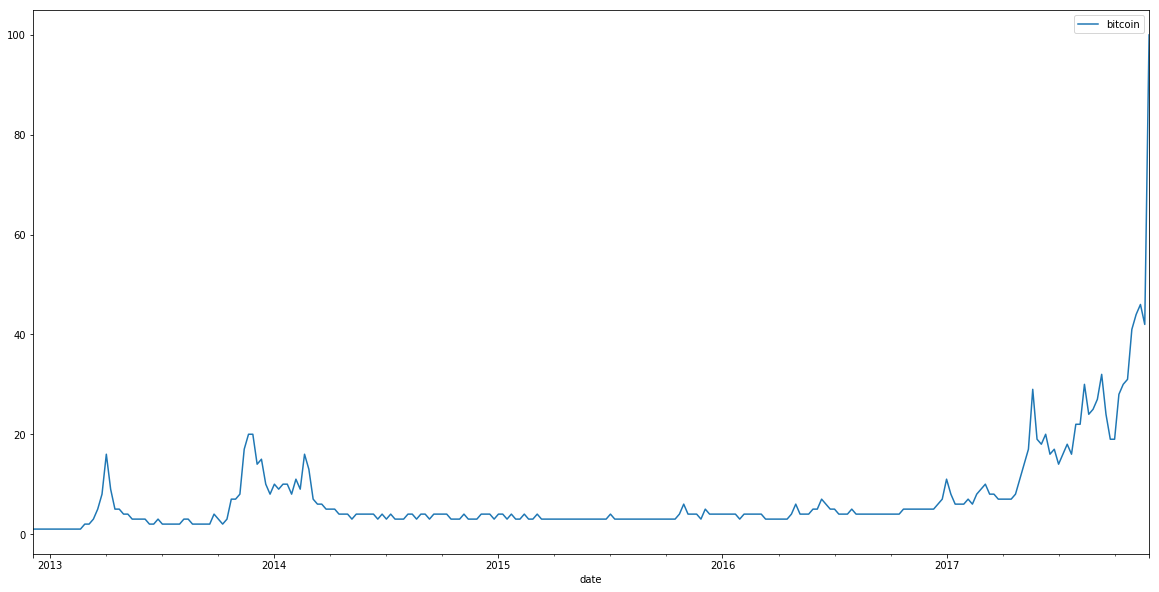

In [53]:
%matplotlib inline
import pytrends
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['bitcoin']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')
pytrends.interest_over_time().plot(figsize=(20,10))
# plt.savefig('Bitcoin.png')


## Recent adoption trend across different loactions mapped with tableau

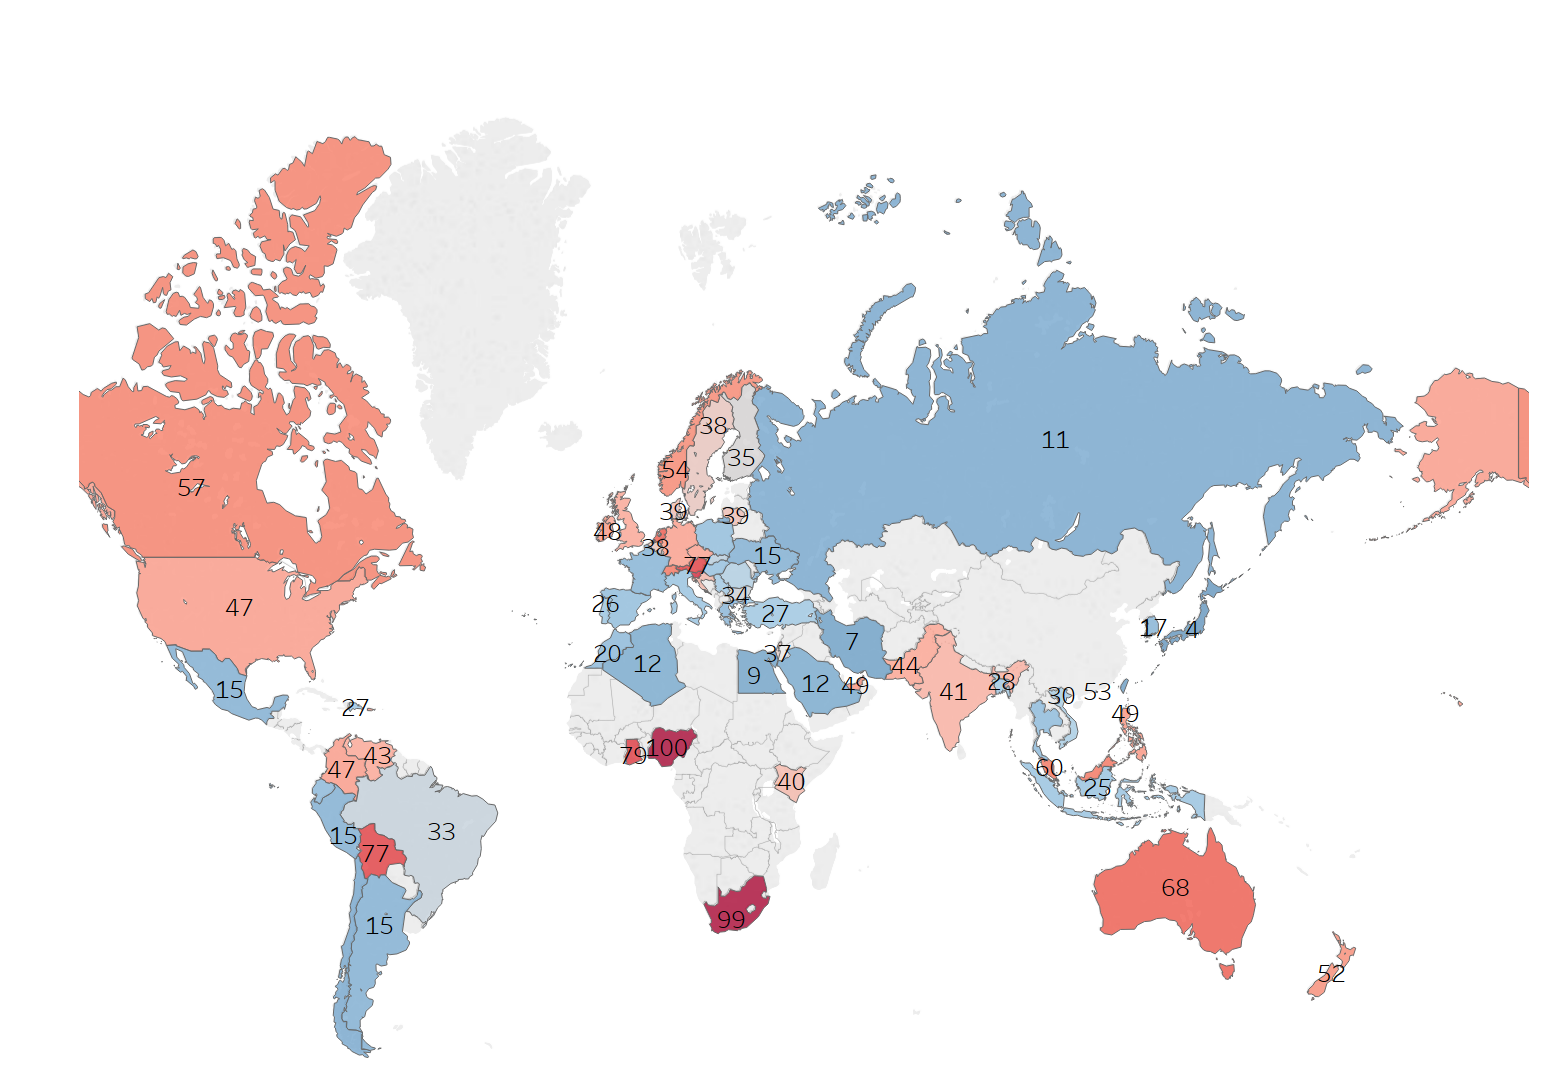

In [55]:
#pytrends.interest_by_region()
file2 = Image.open("Region Plot.png")
file2

# 8) Bitcoin Sentiment analysis using News

### All required functions

In [57]:
import nltk

def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

def do_pos_neg_sentiment_analysis(text_list):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    positive_wordlist=[]
    negative_wordlist=[]
    for text in text_list:
        cpos = cneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                cpos+=1
                positive_wordlist.append(word)
            if word in negative_words:
                cneg+=1
                negative_wordlist.append(word)
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

def pos_neg_words_of_text(text):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    positive_wordlist=[]
    negative_wordlist=[]
    for word in word_tokenize(text):
        if word in positive_words:
            positive_wordlist.append(word)
            positive_string=" ".join(positive_wordlist)
        if word in negative_words:
            negative_wordlist.append(word)
            negative_string=" ".join(negative_wordlist)
    return (positive_string,negative_string)
    
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

emotion_dict = get_nrc_data()

def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

def comparative_emotion_analyzer(text_tuples):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "entity","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[0][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
def single_word_cloud(text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
def multiple_word_clouds(texts,COL_NUM,ROW_NUM):
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Remove unwanted words
    #As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
    DELETE_WORDS = []
    def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
        for word in DELETE_WORDS:
            text_string = text_string.replace(word,' ')
        return text_string

    #Remove short words
    MIN_LENGTH = 0
    def remove_short_words(text_string,min_length = MIN_LENGTH):
        word_list = text_string.split()
        for word in word_list:
            if len(word) < min_length:
                text_string = text_string.replace(' '+word+' ',' ',1)
        return text_string


    #Set up side by side clouds
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

    for i in range(0,len(texts)):
        text_string = remove_words(texts[i][1])
        text_string = remove_short_words(text_string)
        ax = axes[i//2, i%2] 
        ax.set_title(texts[i][0])
        wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
        ax.imshow(wordcloud)
        ax.axis('off')
    plt.show()

### Getting text from news

In [58]:
def get_data(x):
    from bs4 import BeautifulSoup
    import requests
    url = "https://finance.yahoo.com/quote/"+x+"/?p="+x
    response = requests.get(url)
    if response.status_code == 200:
        try:
            soup = BeautifulSoup(response.content, 'lxml')
            data = soup.find_all('h3', class_="Mb(5px)")
            link_list = list()
            for item in data:
                a_ref = item.find('a')['href']
                if(a_ref[:5]=='https'):
                    link_list.append(a_ref)
                else:
                    link_list.append("https://finance.yahoo.com"+a_ref)
            return "".join(corpus_gen(link_list))

        except:
            pass
        
def corpus_gen(link_list):
    data_list = list()
    for item in link_list:
        url = item
        data = list()
        response = requests.get(url)
        if response.status_code == 200:
            try:
                soup = BeautifulSoup(response.content, 'lxml')   
                a=soup.find_all('p', class_="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm")
                a = a[:len(a)-3]
                for item in a:
                    data.append(item.get_text())
                data_list.append(" ".join(data))
        
            except:
                pass
    return data_list


In [111]:
BTC_text=get_data('BTC-USD')
BTC_text[:1000]

'Dunny Medina is the head of capital markets and securities at Oziel Law, a business and technology law firm based in Toronto, Canada.  There are certain seismic disruptions to the natural order that force governments around the word to pay attention and react quicker than the tools of governance ordinarily allow.  Epidemics, terrorism, nuclear energy, world war and now…blockchain technology.\xa0Specifically, initial coin offerings (ICOs) are making governments itchy. If you are trying to keep up, you will be very busy and very confused. Each week seems to bring another pronouncement from yet another country. Big or small, everyone has something to say. We’ve heard from behind the veiled curtain of mega-states like Russia and China, and we’ve heard from the neighborly nations like Canada and the Isle of Man. The message is far from clear. While many nations can stand united on challenges like melting ice caps, they’re a bit more baffled with crypto. So, how does a government react when

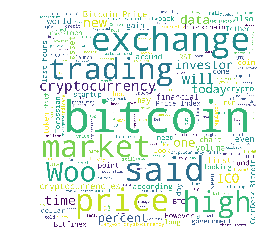

In [60]:
single_word_cloud(BTC_text)

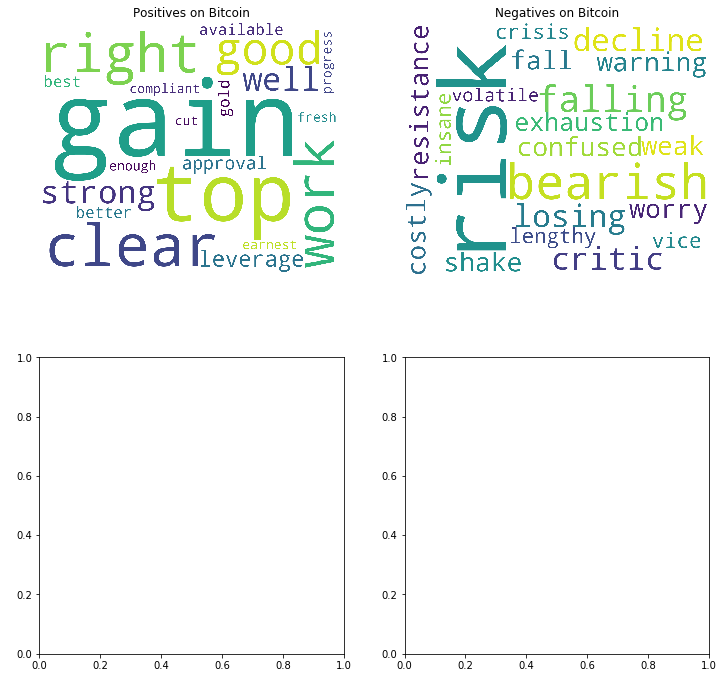

In [63]:
l=[('Positives on Bitcoin',pos_neg_words_of_text(BTC_text)[0]),('Negatives on Bitcoin',pos_neg_words_of_text(BTC_text)[1])]
multiple_word_clouds(l,COL_NUM = 2,ROW_NUM = 2)

In [64]:
texts=[('Bitcoin',get_data('BTC-USD')),('Ethereum',get_data('ETH-USD')),('Litecoin',get_data('LTC-USD'))]
do_pos_neg_sentiment_analysis(texts)

[('Bitcoin', 0.020846560846560846, 0.015873015873015872),
 ('Ethereum', 0.019110926464478605, 0.011632737847943497),
 ('Litecoin', 0.033310201249132546, 0.01734906315058987)]

In [65]:
comparative_emotion_analyzer(texts)

entity               fear	trust negative positive joy   disgust anticip sadness surprise
Bitcoin              0.01	0.02	0.02	0.04	0.01	0.00	0.01	0.01	0.00
Ethereum             0.01	0.02	0.01	0.03	0.00	0.00	0.01	0.00	0.00
Litecoin             0.01	0.03	0.02	0.04	0.02	0.00	0.02	0.01	0.01


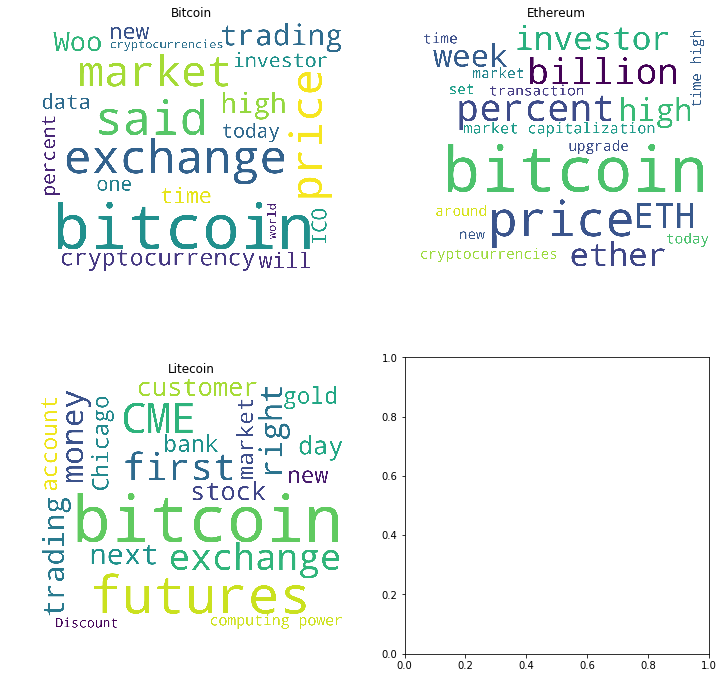

In [66]:
multiple_word_clouds(texts,COL_NUM = 2,ROW_NUM = 2)

## Polarity and subjectivity analysis using twitter

In [67]:
# import tweepy library for twitter api access and textblob libary for sentiment analysis
import csv
import tweepy
import numpy as np
from textblob import TextBlob


def main():

    # set twitter api credentials
    consumer_key= 'LQAsN5ZOFaTNvFbtZLD50v6aZ'
    consumer_secret= 'bQTzVa7LbVgZbYxNOukBPYqwmoCVuSkRjKHlb597gGTsSpQDKK'
    access_token='1652473884-Iw1iEJ2dxUY35gUvZb9W9QnGWWmtyp1yNPslTPk'
    access_token_secret='61XSC7JyX9xA8CErmeQX9uCkmUqOIsqlC0d1STeQ6vu5d'

    # set path of csv file to save sentiment stats
    path = 'CSV_FILE_PATH'

    # access twitter api via tweepy methods
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    twitter_api = tweepy.API(auth)

    # fetch tweets by keywords
    tweets = twitter_api.search(q=['bitcoin, price'], count=100)

    # generate sentiment stats
    get_sentiment_stats(tweets, get_polarity, get_subjectivity)

    # save sentiment data to csv file
    save_sentiment_to_csv(tweets, path, classify_sentiment)
    

def get_polarity(tweets):
    # run polarity analysis on tweets

    tweet_polarity = []

    for tweet in tweets:
        analysis = TextBlob(tweet.text)
        tweet_polarity.append(analysis.sentiment.polarity)

    return tweet_polarity


def get_subjectivity(tweets):
    # run subjectivity analysis on tweets

    tweet_subjectivity = []

    for tweet in tweets:
        analysis = TextBlob(tweet.text)
        tweet_subjectivity.append(analysis.sentiment.subjectivity)

    return tweet_subjectivity


def classify_sentiment(analysis, threshold = 0):
    # classify sentiment polarity as positive or negative

    if analysis.sentiment.polarity > threshold:
        return 'Positive'
    elif analysis.sentiment.polarity < threshold:
        return 'Negative'
    else:
        return 'Neutral'


def get_sentiment_stats(tweets, get_polarity, get_subjectivity):
    # generate sentiment stats

    polarity = get_polarity(tweets)
    subjectivity = get_subjectivity(tweets)

    print('Polarity count: %s' % np.count_nonzero(polarity))
    print('Polarity average: %.3f' % np.mean(polarity))
    print('Polarity standard deviation: %.3f' % np.std(polarity))
    print('Polarity coefficient of variation: %.3f' % (np.std(polarity) / np.mean(polarity)))
    print('********')
    print('Subjectivity count: %s' % np.count_nonzero(subjectivity))
    print('Subjectivity average: %.3f' % np.mean(subjectivity))
    print('Subjectivity standard deviation: %.3f' % np.std(subjectivity))
    print('Subjectivity coefficient of variation: %.3f' % (np.std(subjectivity) / np.mean(subjectivity)))


def save_sentiment_to_csv(tweets, path, classify_sentiment):
    # save tweets, polarity, subjectivity, and sentiment class to csv file
    with open(path, 'w') as f:
        writer = csv.writer(f)
        f.write('tweet, polarity, subjectivity, sentiment_class\n')

        for tweet in tweets:
            analysis = TextBlob(tweet.text)
            writer.writerow([tweet.text.encode('utf8'), analysis.sentiment.polarity, analysis.sentiment.subjectivity, classify_sentiment(analysis)])

        f.close()


if __name__ == '__main__':
    main()

Polarity count: 71
Polarity average: 0.121
Polarity standard deviation: 0.119
Polarity coefficient of variation: 0.983
********
Subjectivity count: 79
Subjectivity average: 0.395
Subjectivity standard deviation: 0.210
Subjectivity coefficient of variation: 0.532


# 9) Applying the above sentiment analysis for most 5 trendy stocks in SP500

## Finding top 5 trendy stocks from google api

In [112]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
from bs4 import BeautifulSoup
import requests

pytrends = TrendReq(hl='en-US', tz=360)

# Getting all the stocks of SP500
url = "https://www.slickcharts.com/sp500"
l = list()
response = requests.get(url)
if response.status_code == 200:
    try:
        soup = BeautifulSoup(response.content, 'lxml')
        table_data = soup.find('table', id="example-1",class_="table table-striped table-bordered")
        a_ref = table_data.find_all('a')
        for item in a_ref:
            l.append(item.get_text())
            
    except:
        pass

# Function for cleaning the names of the stocks in SP500 got from the above code to use in google trends api
def clean(item):
    a = item
    if "Inc." in a or "inc." in a:
        a = a.replace("Inc.","Inc")
        a = a.replace("inc.","").strip()
        if ("Class A" in a):
            a = a.replace("Class A","").strip()
        elif ("Class B" in a):
            a = a.replace("Class B","").strip()
        if ("Class C" in a):
            a = a.replace("Class C","").strip()
    elif "Class A" in a:
        a = a.replace("Class A","").strip()
    elif "Class B" in a:
        a = a.replace("Class B","").strip()
    elif "Class C" in a:
        a = a.replace("Class C","").strip()
    elif "Class K" in a:
        a = a.replace("Class K","").strip()
    elif "Corp." in a:
        a = a.replace("Corp.","Corp").strip()
    return a

# Function for getting the mean of interest_over_time for all these stocks
# We can get only trends of 5 stocks at a time
def sp500(sdict,slist):
    i=0
    while i<len(slist):
        try:
            kw_list = [slist[i],slist[i+1],slist[i+2],slist[i+3],slist[i+4]]
            pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')
#             print(pytrends.interest_over_time()[item].mean())
            sdict[slist[i]] = pytrends.interest_over_time()[slist[i]].mean()
            sdict[slist[i+1]] = pytrends.interest_over_time()[slist[i+1]].mean()
            sdict[slist[i+2]] = pytrends.interest_over_time()[slist[i+2]].mean()
            sdict[slist[i+3]] = pytrends.interest_over_time()[slist[i+3]].mean()
            sdict[slist[i+4]] = pytrends.interest_over_time()[slist[i+4]].mean()
#             print("test")
            
        except:
            pass
        i += 5
#     return sdict

#Cleaning the stock names
m = list()
for ele in l:
    a = clean(ele)
    m.append(a)

# Intitializing 0s as values and stocks as keys
stocks = dict.fromkeys(m,0)

# Getting people's interest about the stocks
sp500(stocks,m)

# Getting the top trendy stocks of SP500
import operator
sorted_stocks = sorted(stocks.items(), key=operator.itemgetter(1), reverse=True)
sorted_stocks[:15]


[('CA Inc', 79.22307692307692),
 ('Ford Motor Company', 73.25),
 ('Morgan Stanley', 70.78461538461538),
 ('Southern Company', 68.07307692307693),
 ('Johnson & Johnson', 66.67307692307692),
 ('Gap Inc', 65.50769230769231),
 ('Expedia Inc', 64.12307692307692),
 ('Public Storage', 64.06923076923077),
 ('Hershey Company', 63.38461538461539),
 ('Walt Disney Company', 63.315384615384616),
 ('Intel Corporation', 63.29615384615385),
 ('Mosaic Company', 62.33846153846154),
 ('Ball Corporation', 59.80769230769231),
 ('Kansas City Southern', 59.54615384615385),
 ('NIKE Inc', 58.823076923076925)]

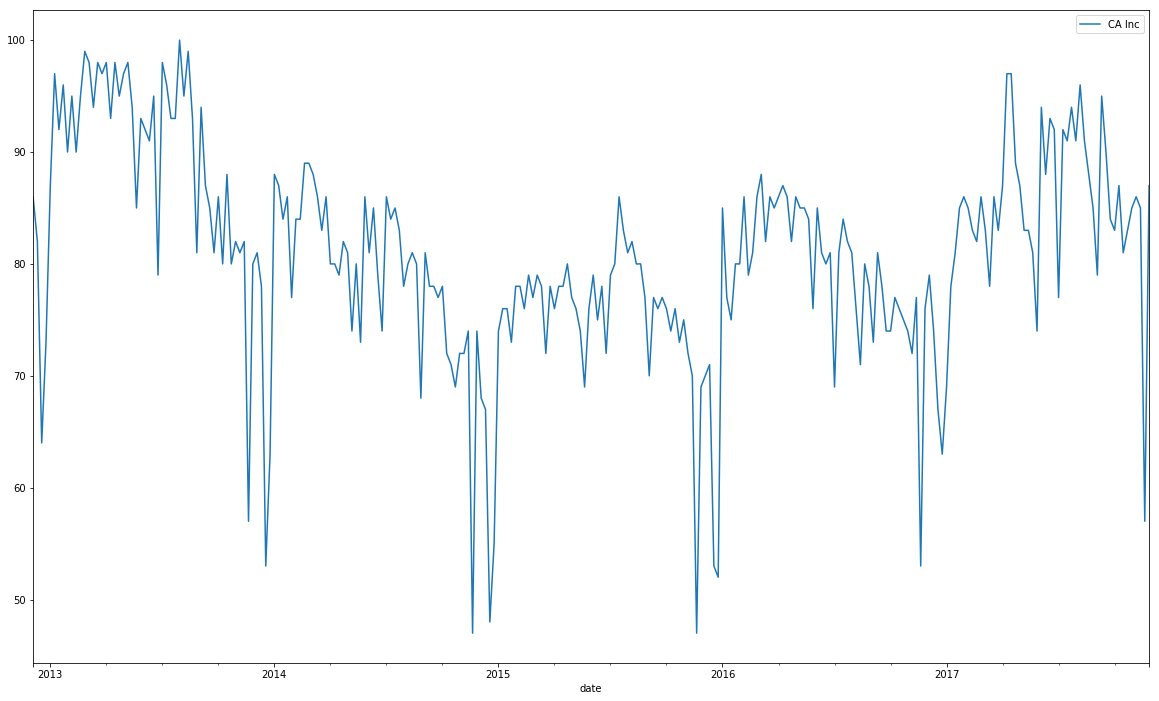

In [69]:
# Getting interest over time of top trendy stock
kw_list = [sorted_stocks[0][0]]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')
df1 = pytrends.interest_over_time().drop(['isPartial'], axis=1)
%matplotlib inline
df1.plot(figsize=(20,12))

In [70]:
# Getting ticker symbol for top 5 trendy stock names to get the news as text
stk_name= list()
stk_ticker = list()
for item in sorted_stocks[:5]:
    stk_name.append(item[0])
# print(stk_name)

url = "https://www.slickcharts.com/sp500"
l = list()
response = requests.get(url)
if response.status_code == 200:
    try:
        soup = BeautifulSoup(response.content, 'lxml')
        table_data = soup.find('table', id="example-1",class_="table table-striped table-bordered")
        form = table_data.find_all('form')
        a_ref = table_data.find_all('a')
        for item in a_ref:
            l.append(clean(item.get_text()))
        for item in form:
            stk_ticker.append(item.find("input")['value'])
        
    except:
        pass
stk_ticker
for i in range(len(stk_ticker)):
    l[i] = (l[i],stk_ticker[i])

full_list = list()
for item in l:
    if item[0] in stk_name:
        full_list.append(item)
full_list

[('Johnson & Johnson', 'JNJ'),
 ('Morgan Stanley', 'MS'),
 ('Southern Company', 'SO'),
 ('Ford Motor Company', 'F'),
 ('CA Inc', 'CA')]

In [71]:
texts2=[('S&P500',get_data('^GSPC')),(full_list[0][0],get_data(full_list[0][1])),(full_list[1][0],get_data(full_list[1][1])),(full_list[2][0],get_data(full_list[2][1])),(full_list[3][0],get_data(full_list[3][1])),(full_list[4][0],get_data(full_list[4][1]))]
do_pos_neg_sentiment_analysis(texts2)

[('S&P500', 0.020394289598912305, 0.01495581237253569),
 ('Johnson & Johnson', 0.024153194765204004, 0.013471901462663588),
 ('Morgan Stanley', 0.02458153993304639, 0.01482544237207078),
 ('Southern Company', 0.025740650801359885, 0.009389671361502348),
 ('Ford Motor Company', 0.02271613008661546, 0.012910606308220298),
 ('CA Inc', 0.025015883100381196, 0.008576874205844982)]

In [72]:
comparative_emotion_analyzer(texts2)

entity               fear	trust negative positive joy   disgust anticip sadness surprise
S&P500               0.00	0.02	0.04	0.03	0.01	0.01	0.02	0.03	0.01
Johnson & Johnson    0.01	0.02	0.02	0.05	0.01	0.00	0.02	0.01	0.00
Morgan Stanley       0.01	0.03	0.02	0.04	0.01	0.00	0.02	0.01	0.01
Southern Company     0.01	0.03	0.01	0.05	0.01	0.00	0.02	0.00	0.00
Ford Motor Company   0.01	0.02	0.02	0.04	0.01	0.00	0.02	0.01	0.01
CA Inc               0.01	0.03	0.01	0.05	0.01	0.00	0.02	0.01	0.00


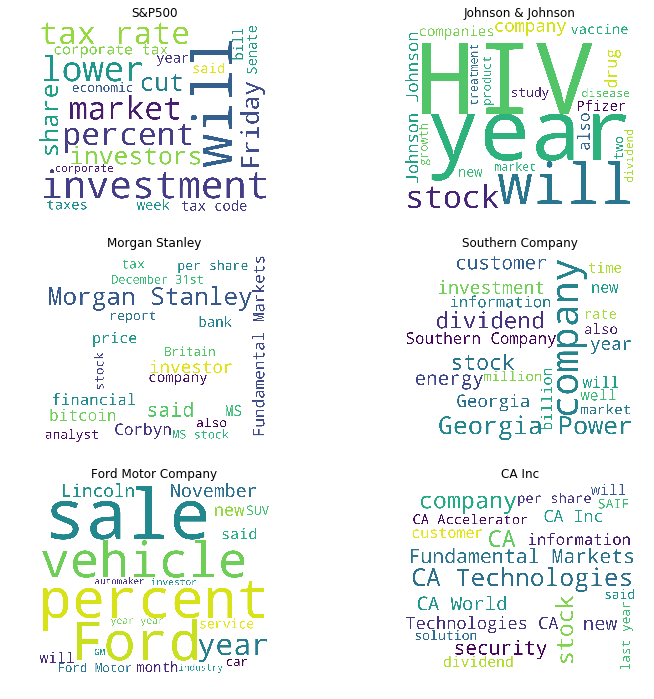

In [73]:
multiple_word_clouds(texts2,COL_NUM = 2,ROW_NUM = 3)

# 9) Machine learning: Linar regression

Populating the interactive namespace from numpy and matplotlib


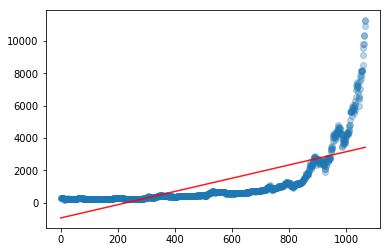

In [91]:
#combined_df.reset_index(level=0, inplace=True)
import statsmodels.api as sm
df3 = combined_df[['date','BTC']]

X = np.array(a)

y = df3.BTC

x = np.array(a)
x = sm.add_constant(x)
est = sm.OLS(y, x)

est = est.fit()

%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(x.min(), x.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X, y, alpha=0.3)  # Plot the raw data
# plt.xlabel("Gross National Product")
# plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

# 10) Macro analysis of the Bitcoin blockchain

### The number of unconfirmed transactions on the Bitcoin blockchain spiked in May 2017. Attempting to identify why led to an analysis of several key performance metrics for the network

### Unconfirmed transactions

In [92]:
## Steup - libraries
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
#import credentials # keep my quandl and plot.ly api keys private

import plotly.plotly as py
import plotly
#from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
#from plotly.graph_objs import *


## Setup - appearance
# get rid of the annoying 'SettingWithCopy' warning
pd.options.mode.chained_assignment = None # default='warn'

# more than one print of an unassigned variable
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";

# offline plotly
plotly.offline.init_notebook_mode()

color1 = '#137a28' # dark green
color2 = '#b3d1b9' # light transparent green


## import mempool data downloaded from https://blockchain.info/charts/mempool-count?timespan=all
mempool = pd.read_csv(
    'mempool-count.csv', 
    header=None, 
    names=['DateTime','size'], 
    parse_dates=[0], 
    infer_datetime_format=True
    )

# split the datetime to date and time
temp = pd.DatetimeIndex(mempool['DateTime'])
mempool['Date'] = temp.date
mempool['Time'] = temp.time
del mempool['DateTime']

# reorder the columns
cols = ['Date','Time','size']
mempool = mempool[cols]
mempool.set_index('Date', inplace=True)

d2 = pd.to_datetime('2017-07-31').date()
mempool = pd.concat([mempool.loc[:d2]])


# there are 3 values per day. get average mempool size for each day
mempool = mempool.groupby([mempool.index.get_level_values('Date')]).mean()


mempool['size_av']=mempool['size'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=mempool['size'], 
    name='Daily average',
    line = dict(
        color = (color2),
        width = 2,))

series2 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=mempool['size_av'], 
    name='Weekly average',
    line = dict(
        color = (color1),
        width = 3,))

data = [series1, series2]

layout = go.Layout(
    title='Unconfirmed transactions',
    yaxis=dict(title='Number of transactions'),
    legend=dict(orientation="h", yanchor='top', y=1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='bitcoin_mempool')
#py.iplot(fig, filename='bitcoin_mempool')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### The number of transactions waiting to be confirmed on the Bitcoin blockchain increased to an all time maximum on May 18th of 175,978. For comparison, the average value in 2016 was less than 10,000.Once the the number of unconfirmed transactions had peaked, it fell about as quickly as it rose and by mid July was generally below 10,000 again.

## Median transaction confirmation time (minutes)

#### I would expect that the average time taken to confirm a transaction will increase with the size of the unconfirmed transaction pool. The figure below shows the median time in minutes for a new transaction to be confirmed.

In [93]:
# The Daily Median time taken for transactions to be accepted into a block, presumably in minutes
ATRCT = quandl.get("BCHAIN/ATRCT")
ATRCT = ATRCT.loc['2016-04-24':'2017-07-31']

ATRCT['artct_av']=ATRCT['Value'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=ATRCT['Value'], 
    name='Daily median',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=ATRCT['artct_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Median time taken for transactions to be accepted into a block',
    yaxis=dict(title='Time (minutes)'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_acceptance_time')
#py.iplot(fig, filename='btc_acceptance_time')

#### The median transaction confirmation time does not increase noticeably when the pool of unconfirmed transactions increases, in fact the two features have only a weak Pearson correlation of 0.37 (details below). This is surprising because I expected that the time taken to confirm a transaction would increases when the pool of transactions waiting to be confirmed increases.Perhaps this is because only valid transactions can be confirmed and included in the median average calculation, but invalid transactions are included in the pool of transactions awaiting confirmation. One way to test this would be to query the transactions awaiting confirmation and quantify if they are valid and what fee rate they are offering.

## Average block size (daily, MB)¶

#### Each block in the Bitcoin network had a maximum size of 1MB before 1 August 2017. As the Bitcoin network has grown and transaction volume has increased the blocksize limit began to limit transaction volume.Was the increase in unconfirmed transactions correlated to the blocks getting “filled up” to their maximum 1MB size?

In [94]:
# The Average block size in MB
AVBLS = quandl.get("BCHAIN/AVBLS")

av_bs = AVBLS.loc['2016-04-24':'2017-07-31']
av_bs['Size']=av_bs['Value']
del av_bs['Value']

av_bs['Size_av']=av_bs['Size'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=av_bs['Size'], 
    name='Average',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=av_bs['Size_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Block size',
    yaxis=dict(title='Block size (MB)'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_block_size')
#py.iplot(fig, filename='btc_block_size')

#### From March through June the blocksizes seem to have frequently hit their maximum possible size, suggesting that the Bitcoin network was processing the maximum amount of data possible. The increase in unconfirmed transactions occurred from mid-April to end of June.The average block size began a sharp decrease on July 2nd, and at the same time the median transaction confirmation time also began a quick reduction. By July 2nd the number of unconfirmed transactions had already fallen back to “normal” levels.(Not all transactions are the same size, as a transaction can have any number of outputs and inputs, and a transaction with many inputs and/or outputs would be a larger amount of data than a transaction with only 1 input and 1 or 2 outputs.).Lets confirm if the number of transactions increased over the same period:

## Average number of transactions per (1MB) block¶

In [95]:
# The average number of transactions per block. each day?
NTRBL = quandl.get("BCHAIN/NTRBL")
NTRBL = NTRBL.loc['2016-04-24':'2017-07-31']

NTRBL['Size_av']=NTRBL['Value'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=NTRBL['Value'], 
    name='Average transactions per block',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=NTRBL['Size_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Average number of transactions per block',
    yaxis=dict(title='Number of transactions'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_tnsx_per_block')
#py.iplot(fig, filename='btc_tnsx_per_block')

#### The average number of transactions per block hit a peak at the end of May 2017 and then saw two sharp declines. It fell quickly at the beginning of June and then again at the beginning of July.In June the blocksizes remained more or less as large as possible which suggests the blocks were full of a few large transactions. At this time the size of the mempool was decreasing rapidly.At the beginning of July the number of transactions per block reduced and the average blocksize was also rapidly reducing. This suggests that the volume of smaller transactions had reduced.The difference in average blocksizes in early June and early July suggests that in early June the number of transactions reduced because the average size of transactions had increased, but in July the number of transactions per block reduced because fewer transactions were being created.Perhaps Bitcoin exchanges and other organisations with high transaction volumes had changed their behaviour and begun posting larger transactions with many inputs and/or outputs, rather than posting many smaller transactions with fewer inputs and/or outputs.Bitcoin is often held by speculators who expect the value of a Bitcoin to increase. Perhaps increases in transaction volume are correlated to increases in Bitcoins value.

## Transaction fees earned by miners each day¶

#### Transaction fees are charged to users sending Bitcoin. Node operators (miners) collect unconfirmed transactions, confirm their validity and perform the proof-of-work requirements to submit these transactions as a new block of the blockchain.In order to provide an incentive for node operators to process and confirm new transactions, and to compensate for the equipment and energy costs required to do so, a fee is charged to confirm each transaction. The size of the fee is proportional to the size (in bytes) of the transaction and is quantified as the fee rate (Satoshis/byte), otherwise miners would prefer smaller sized transactions as they could fit more into each block.The pool of unconfirmed transactions is automatically sorted by transaction fee rate, so that miners confirm transactions with a higher fee rate before those with a lower fee rate.Because of this, it is expected that as the number of unconfirmed transactions increases, the fees paid to ensure a transaction gets processed will also increase. This is shown in the figure below.Perhaps one reason the number of unconfirmed transactions grew was because the fee rate offered for many of these transactions was below some threshold where it wasn’t worth the miners efforts to confirm them.The total value of confirmation fees earned per day and the size of the unconfirmed transaction pool are plotted below:

In [96]:
# transaction fees - the total BTC value of transaction fees miners earn per day.
TRFEE = quandl.get("BCHAIN/TRFEE")

tn_fee = TRFEE.loc['2016-04-24':'2017-07-31']
tn_fee['Fee']=tn_fee['Value']
del tn_fee['Value']

tn_fee['Fee_av']=tn_fee['Fee'].rolling(window=1).mean();

trace1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=mempool['size'], 
    name='Unconfirmed transactions' ) # used later

trace2 = go.Scatter( 
    x=tn_fee.index.get_level_values('Date'), 
    y=tn_fee['Fee_av'], 
    name='Transaction fee',
    yaxis='y2' )

data2 = [trace1, trace2]

layout = go.Layout(
    title='Total value (BTC) of transaction confirmation fees earned each day',
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5),
    xaxis=dict(
        ticklen=7,
        tickcolor='#ffffff',
    	),
    yaxis=dict(
        title='Number of unconfirmed transactions',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True,
        rangemode='tozero'
        ),
    yaxis2=dict(
        title='Daily sum of confirmation fees (BTC)',
        zeroline=False,
		overlaying='y',
		side='right',
        rangemode='tozero'
    )
)
fig = go.Figure(data=data2, layout=layout)
plotly.offline.iplot(fig, filename='multiple-axes-double')
#py.iplot(fig, filename='multiple-axes-double')

#### It looks as if confirmation fees correlate positively to the number of unconfirmed transactions. This is expected as users would need to pay higher fees when there are a lot of unconfirmed transactions in order to have their transactions moved towards the front of the queue and processed reasonably quickly.However it looks as if changes to a miners fee rate lags behind changes in the size of the unconfirmed transaction pool by about 2 weeks. The variation in the transaction fee is also a lot smaller than variation in the size of the unconfirmed transaction pool.This suggests that the method for calculating transaction the fee rate could be improved so that fee rate responds faster to changes in the number of transactions awaiting confirmation. This would make mining less profitable and more competitive, and would make the Bitcoin network cheaper for users.Lets look at how expensive it is to use the Bitcoin network by analysing the transaction fee rate relative to transaction values.

In [97]:
# The Average transaction confirmation fee rate (%)
CPTRV = quandl.get("BCHAIN/CPTRV")
CPTRV = CPTRV.loc['2016-04-24':'2017-07-31']

CPTRV['Fee_av']=CPTRV['Value'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=CPTRV['Value'], 
    name='Fee rate',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=mempool.index.get_level_values('Date'), 
    y=CPTRV['Fee_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Miners revenue as as percentage of the transaction volume',
    yaxis=dict(title='Fee rate (%)'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_tnsx_fee_rate')
#py.iplot(fig, filename='btc_tnsx_fee_rate')

#### The results show that a fee rate (Miners Revenue/Transaction Volume) of 0.5-1% is typical on the Bitcoin network. This is a bit cheaper than ecommerce payment methods.Surprinsingly, there is a correlation of -0.25 with the number of unconfirmed transactions. This means the fee rate decreases when the number of unconfirmed transactions increases. The correlation is weak. One possible explanation for this may be that activity on the network increases when the price of Bitcoin increases. When the price of Bitcoin increases, more resources are allocated to mining because it is increasingly profitable. Also, more people decide to buy Bitcoin because it’s becoming so valuable. This leads to more transactions but even more miners competing to confirm transactions and claim the rewards. This increase in supply drives down the transaction confirmation fee rate.Lets see how the number of transactions per day has changed in 2017 so far.

## Number of transactions per day¶

In [98]:
# Number of Transactions from Popular Addresses
NTREP = quandl.get("BCHAIN/NTREP") # excluding popular addresses
NTRAN = quandl.get("BCHAIN/NTRAN") # from all addresses

NTREP = NTREP.loc['2017-01-13':'2017-07-31'] #excl. popular
NTRAN = NTRAN.loc['2017-01-13':'2017-07-31'] #all addresses

NTRFP = NTRAN - NTREP # Popular only
NTRFP['all'] = NTRAN['Value']
NTRFP['unpop'] = NTREP['Value']
NTRFP['pop'] = NTRFP['all'] - NTRFP['unpop'] 
#NTRFP.head()

NTRFP['pop_av']=NTRFP['Value'].rolling(window=7).mean();
NTRFP['unpop_av']=NTRFP['unpop'].rolling(window=7).mean();
NTRFP['all_av']=NTRFP['all'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=NTRFP.index.get_level_values('Date'), 
    y=NTRFP['all'], 
    name='From all addresses',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=NTRFP.index.get_level_values('Date'), 
    y=NTRFP['all_av'], 
    name='From all addresses - 7 day average',
    line = dict(
        color = (color1),
        width = 3))

series3 = go.Scatter( 
    x=NTRFP.index.get_level_values('Date'), 
    y=NTRFP['unpop'], 
    name='Transactions excluding 100 most popular addresses',
    yaxis='y1',
    line = dict(
        color = ('#CEB7DF'),
        width = 2))

series4 = go.Scatter( 
    x=NTRFP.index.get_level_values('Date'), 
    y=NTRFP['unpop_av'], 
    name='Transactions excluding 100 most popular addresses - 7 day average',
    yaxis='y1',
    line = dict(
        color = ('#830DD4'),
        width = 3))

series5 = go.Scatter( 
    x=NTRFP.index.get_level_values('Date'), 
    y=NTRFP['pop_av'], 
    name='Difference - 7 day average',
    yaxis='y2',
    line = dict(
        color = ('#4FA6D4'),
        width = 3))

data = [series1, series2, series3, series4, series5]

layout = go.Layout(
    title='Bitcoin transactions per day',
    xaxis=dict(
        ticklen=5,
        tickcolor='#ffffff',
    	),
    yaxis=dict(
        title='Transactions per day',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        ticklen=7,
        tickcolor='#ffffff',
        showticklabels=True,
              ),
     yaxis2=dict(
        title='Difference',
        zeroline=False,
		overlaying='y',
		side='right',
            ),
    legend=dict(
        orientation="v", 
        y=-0.45,  
        x=0,
        ) 
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_num_tnsxs')
#py.iplot(fig, filename='btc_num_tnsxs')

#### The figure above shows the number of transactions posted each day from all addresses, and the number of transactions each day from addresses excluding the 100 most popular addresses. The difference between the two (the number of transactions from the 100 most popular addresses) is shown in blue using the axis on the right.There is a positive correlation with the size of the unconfirmed transaction pool. Interestingly there is a stronger correlation with transactions created by the 100 most popular addresses (0.54) than for unpopular addresses (0.46). Possible reasons for this are discussed below.Finally, lets consider the influence of the price of Bitcoin on the size of the unconfirmed transaction pool:

In [99]:
# The USD value of BTC
MKPRU = quandl.get("BCHAIN/MKPRU")
MKPRU = MKPRU.loc['2016-04-24':'2017-07-31']

MKPRU['mkt_av']=MKPRU['Value'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=MKPRU.index.get_level_values('Date'), 
    y=MKPRU['Value'], 
    name='Daily',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=MKPRU.index.get_level_values('Date'), 
    y=MKPRU['mkt_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Bitcoin price',
    yaxis=dict(title='Price (USD)'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_price')
#py.iplot(fig, filename='btc_price')

#### Apart from showing a notable increase of around 500% in 13 months, the price has a correlation of just 0.42 with the size of the unconfirmed transaction pool.The number of transactions coming from popular addresses is positively correlated (0.41) to Bitcoin price, suggesting that when the Bitcoin price increases trading activity on exchanges also increases. Transactions from less popular addresses is inversely correlated to Bitcoin price (-0.31) and this could be because when the Bitcoin price surges, individuals holding Bitcoin do not want to spend Bitcoin to make purchases, and will need to use an exchange to convert fiat currencies into Bitcoin.Note that ordinarily a new address is used for each Bitcoin transaction.

## Ratio of unique addresses to transactions¶

#### Finally, I want to compare the number of unique Bitcoin addresses used to the total number of transactions created. I initially expected the ratio of addresses to transactions to be close to 1, not realising that each transaction will contain at least 2 addresses (1 input and 1 output, and probably a 2nd output address which is equal to the input address for the change). If each transaction on average has 2 outputs, then the idea ratio of Bitcoin transactions to addresses will be 0.5.

In [100]:
# unique addresses used each day
NADDU = quandl.get("BCHAIN/NADDU")
NADDU = NADDU.loc['2016-04-24':'2017-07-31']

#number of transactions is NTRAN

RATIO = NTRAN / NADDU

d1 = pd.to_datetime('2017-01-13').date()
d2 = pd.to_datetime('2017-07-31').date()
RATIO = pd.concat([RATIO.loc[d1:d2]])

RATIO['weekly_av']=RATIO['Value'].rolling(window=7).mean();

series1 = go.Scatter( 
    x=RATIO.index.get_level_values('Date'), 
    y=RATIO['Value'], 
    name='Daily',
    line = dict(
        color = (color2),
        width = 2))

series2 = go.Scatter( 
    x=RATIO.index.get_level_values('Date'), 
    y=RATIO['weekly_av'], 
    name='7 day average',
    line = dict(
        color = (color1),
        width = 3))

data = [series1, series2]

layout = go.Layout(
    title='Ratio of transactions to unique addresses',
    yaxis=dict(title='Ratio'),
    legend=dict(orientation="h", yanchor='top', y=1.1, xanchor='center', x=0.5)
    )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='btc_add_tnsx_ratio')
#py.iplot(fig, filename='btc_add_tnsx_ratio')

#### The figure above shows that the ratio of unique Bitcoin transactions to unique addresses approaches 0.5. If users reuse an address for multiple transactions (which is bad) then the ratio will rise above 0.5, and if users create transactions with more than the usual minimum of 2 unique addresses then the ratio will dip below 0.5.

## Correlation between each time series¶

#### The table below shows the Pearson correlation coefficients between each time series considered.

In [101]:
# using daily averages
tseries = [
    	mempool['size'],
		ATRCT['Value'],
		av_bs['Size'],
	 	NTRBL['Value'],
		tn_fee['Fee'],
		CPTRV['Value'],
		MKPRU['mkt_av'],
		NTRFP['Value'],
		NTRFP['unpop'],
        RATIO['Value']
		]


cols = ['Unconf trnsx', 
        'Conf time', 
        'Block size',
        'Trnsx/block',
        'Conf fees',
        'Fee rate',
        'USD/BTC',
        'Trnsx - pop addrs',
        'Trnsx - unpop addrs',
        'Tnsx : Addrs ratio']

tbl = np.zeros((len(tseries), len(tseries))) 

for i in range(len(tseries)):
    for j in range(len(tseries)):
        tbl[i,j] = tseries[i].corr(tseries[j], method='pearson', min_periods=None)

pd.DataFrame(data=tbl,    # values
              index=cols,    # 1st column as index
              columns=cols)  # 1st row as the column names

Unconf trnsx  Conf time  Block size  Trnsx/block  \
Unconf trnsx             1.000000   0.367694    0.430174     0.480559   
Conf time                0.367694   1.000000    0.644742     0.635315   
Block size               0.430174   0.644742    1.000000     0.837809   
Trnsx/block              0.480559   0.635315    0.837809     1.000000   
Conf fees                0.651296   0.486090    0.623952     0.495997   
Fee rate                -0.259086  -0.312045   -0.532833    -0.596952   
USD/BTC                  0.388801   0.342080    0.475930     0.215177   
Trnsx - pop addrs        0.535206   0.054786    0.339330     0.282945   
Trnsx - unpop addrs      0.447576   0.283015    0.453510     0.805565   
Tnsx : Addrs ratio       0.054242   0.164483    0.062734     0.449772   

                     Conf fees  Fee rate   USD/BTC  Trnsx - pop addrs  \
Unconf trnsx          0.651296 -0.259086  0.388801           0.535206   
Conf time             0.486090 -0.312045  0.342080           0.054786   
Block size            0.623952 -0.532833  0.475930           0.339330   
Trnsx/block           0.495997 -0.596952  0.215177           0.282945   
Conf fees             1.000000 -0.265631  0.824995           0.579680   
Fee rate             -0.265631  1.000000 -0.153129          -0.393621   
USD/BTC               0.824995 -0.153129  1.000000           0.387861   
Trnsx - pop addrs     0.579680 -0.393621  0.387861           1.000000   
Trnsx - unpop addrs   0.340477 -0.364099 -0.301249           0.317509   
Tnsx : Addrs ratio   -0.363753 -0.006777 -0.716468          -0.287652   

                     Trnsx - unpop addrs  Tnsx : Addrs ratio  
Unconf trnsx                    0.447576            0.054242  
Conf time                       0.283015            0.164483  
Block size                      0.453510            0.062734  
Trnsx/block                     0.805565            0.449772  
Conf fees                       0.340477           -0.363753  
Fee rate                       -0.364099           -0.006777  
USD/BTC                        -0.301249           -0.716468  
Trnsx - pop addrs               0.317509           -0.287652  
Trnsx - unpop addrs             1.000000            0.552083  
Tnsx : Addrs ratio              0.552083            1.000000